In [1]:
#https://gist.github.com/lindacmsheard/c6df1b511f09a3a5939280bd51ebe6b9
import sys
print(sys.version)
print(sys.executable)

3.6.2 |Anaconda, Inc.| (default, Oct  5 2017, 07:59:26) 
[GCC 7.2.0]
/anaconda/envs/experiment_env/bin/python


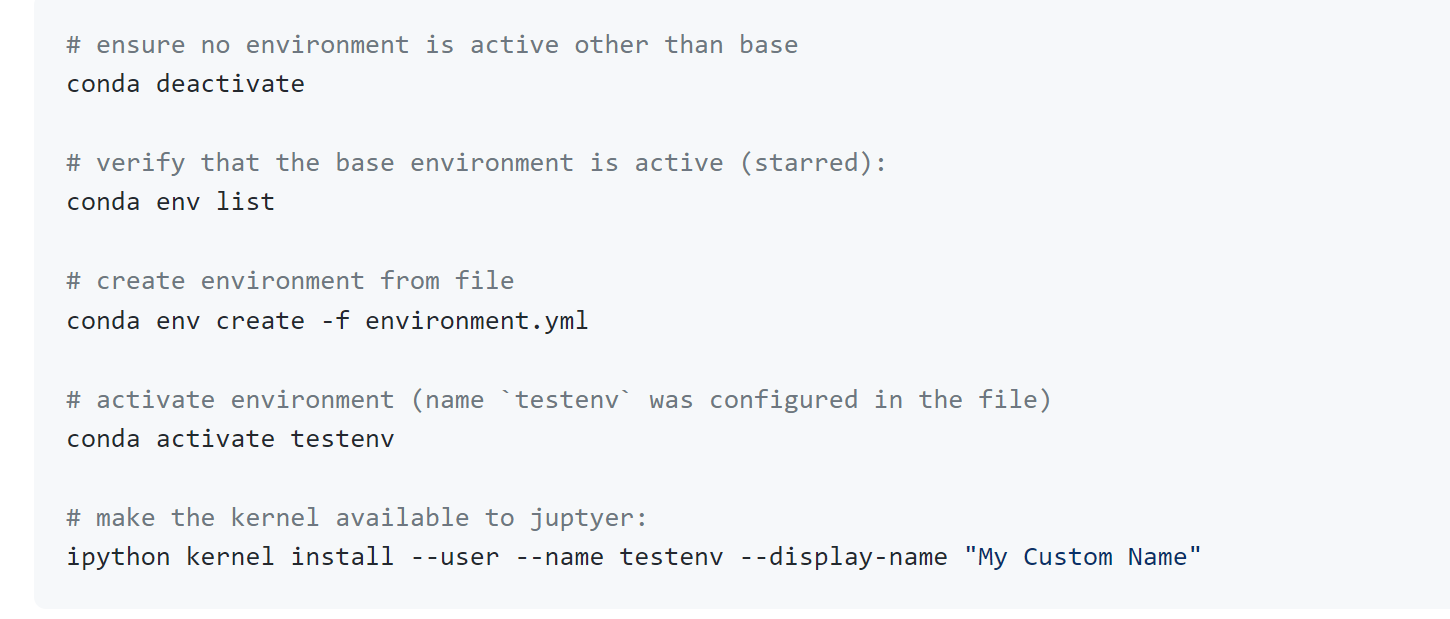

In [2]:
from IPython.display import Image

Image(filename="./image/create_custom_conda_environment.PNG")

In [3]:
import azureml.core
from azureml.core import Workspace
import pandas as pd

# Load the workspace from the saved config file
ws = Workspace.from_config()
print('Ready to use Azure ML {} to work with {}'.format(azureml.core.VERSION, ws.name))

Ready to use Azure ML 1.38.0 to work with mm-hackathon-prep


In [4]:
df1 = pd.read_csv('./Data/Train1.csv')
df2 = pd.read_csv('./Data/Train2.csv')
print(df1.shape)
print(df2.shape)

(917, 6)
(917, 8)


In [5]:
df1.columns

Index(['passenger_id', 'fare', 'cabin', 'embarked', 'home.dest', 'survived'], dtype='object')

In [6]:
df2.columns

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket'],
      dtype='object')

In [7]:

df = df1.merge(df2, on = 'passenger_id', how = 'inner')

In [8]:
df.columns

Index(['passenger_id', 'fare', 'cabin', 'embarked', 'home.dest', 'survived',
       'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket'],
      dtype='object')

In [9]:
print(df.shape)

cols = df.columns
for x in cols:
    print(x)

(917, 13)
passenger_id
fare
cabin
embarked
home.dest
survived
pclass
name
sex
age
sibsp
parch
ticket


## View Data

In [10]:
df.head(5)

,passenger_id,fare,cabin,embarked,home.dest,survived,pclass,name,sex,age,sibsp,parch,ticket
0,501,8.0500,NaN,S,NaN,0.0,3.0,"Webber, Mr. James",male,NaN,0.0,0.0,SOTON/OQ 3101316
1,588,21.0000,NaN,S,"Ilfracombe, Devon",0.0,2.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2
2,402,24.1500,NaN,S,NaN,0.0,3.0,"Van Impe, Miss. Catharina",female,10.0,0.0,2.0,345773
3,1193,15.5000,NaN,Q,NaN,0.0,3.0,"McEvoy, Mr. Michael",male,NaN,0.0,0.0,36568
4,686,211.3375,B3,S,"St Louis, MO",1.0,1.0,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0.0,1.0,24160


In [11]:
df.describe(include = 'all')

,passenger_id,fare,cabin,embarked,home.dest,survived,pclass,name,sex,age,sibsp,parch,ticket
count,917.000000,917.000000,205,915,514,917.000000,917.000000,917,917,729.000000,917.000000,917.000000,917
unique,NaN,NaN,148,3,290,NaN,NaN,916,2,NaN,NaN,NaN,700
top,NaN,NaN,G6,S,"New York, NY",NaN,NaN,"Connolly, Miss. Kate",male,NaN,NaN,NaN,CA. 2343
freq,NaN,NaN,4,643,47,NaN,NaN,2,585,NaN,NaN,NaN,8
mean,648.186478,32.531370,NaN,NaN,NaN,0.382770,2.314068,NaN,NaN,29.791838,0.489640,0.380589,NaN
std,376.276684,52.195809,NaN,NaN,NaN,0.486328,0.835582,NaN,NaN,14.261060,1.044403,0.837296,NaN
min,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,NaN,NaN,0.333300,0.000000,0.000000,NaN
25%,321.000000,7.895800,NaN,NaN,NaN,0.000000,2.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN
50%,654.000000,14.454200,NaN,NaN,NaN,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN
75%,971.000000,30.070800,NaN,NaN,NaN,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN


## View what columns are missing data

In [12]:
df.isnull().sum()

passenger_id      0
fare              0
cabin           712
embarked          2
home.dest       403
survived          0
pclass            0
name              0
sex               0
age             188
sibsp             0
parch             0
ticket            0
dtype: int64

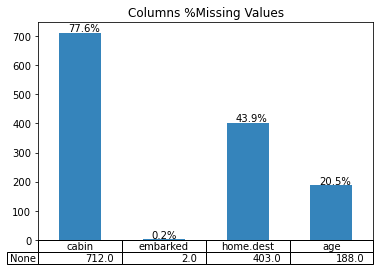

In [13]:
columns_missing = df.isna().sum().where(lambda x : x > 0).dropna()

ax = columns_missing \
.plot(kind='bar', alpha=0.9, title='Columns %Missing Values', table=True)
ax.xaxis.set_visible(False) # hide x axis labels

for x in ax.patches:
    ax.text(x.get_x()+.1, x.get_height()+5, \
            str(round((x.get_height()/df.shape[0])*100, 1))+'%')

## Feature Engineering

Based on the cart above, we know we need to address the missing values without loosing the valuable information included in the columns.

- age
- fare
- cabin: get location on boat out of the cabin information
- embarked
- boat
- body
- home.dest

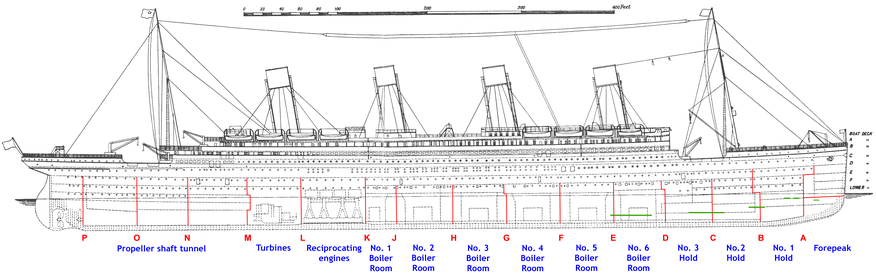

In [14]:
from IPython.display import Image

Image(filename="./image/image.png")

In [15]:
df

,passenger_id,fare,cabin,embarked,home.dest,survived,pclass,name,sex,age,sibsp,parch,ticket
0,501,8.0500,NaN,S,NaN,0.0,3.0,"Webber, Mr. James",male,NaN,0.0,0.0,SOTON/OQ 3101316
1,588,21.0000,NaN,S,"Ilfracombe, Devon",0.0,2.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,S.O./P.P. 2
2,402,24.1500,NaN,S,NaN,0.0,3.0,"Van Impe, Miss. Catharina",female,10.0,0.0,2.0,345773
3,1193,15.5000,NaN,Q,NaN,0.0,3.0,"McEvoy, Mr. Michael",male,NaN,0.0,0.0,36568
4,686,211.3375,B3,S,"St Louis, MO",1.0,1.0,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0.0,1.0,24160
...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,763,79.2000,B86,C,NaN,0.0,1.0,"Giglio, Mr. Victor",male,24.0,0.0,0.0,PC 17593
913,835,13.4167,NaN,C,NaN,1.0,3.0,"Karun, Miss. Manca",female,4.0,0.0,1.0,349256
914,1216,52.5542,D19,S,"Boston, MA",1.0,1.0,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.0,1.0,0.0,11753
915,559,7.8542,NaN,S,"Krakoryd, Sweden Bloomington, IL",0.0,3.0,"Augustsson, Mr. Albert",male,23.0,0.0,0.0,347468


In [16]:
df['cabin'].unique()

array([nan, 'B3', 'D33', 'B78', 'B39', 'D34', 'E24', 'D17',
       'B57 B59 B63 B66', 'D56', 'C7', 'D19', 'F2', 'E44', 'E101', 'C39',
       'B22', 'E34', 'C83', 'C31', 'C22 C26', 'E121', 'T', 'D22',
       'B96 B98', 'C106', 'C118', 'E68', 'C80', 'C47', 'A7', 'D', 'G6',
       'F33', 'E25', 'C89', 'B101', 'C65', 'C85', 'F G63', 'D45', 'C51',
       'E31', 'D28', 'E67', 'B18', 'E8', 'A16', 'D15', 'F4', 'B69', 'B28',
       'C110', 'C99', 'D30', 'C125', 'C68', 'E50', 'C2', 'C105',
       'B51 B53 B55', 'D43', 'C23 C25 C27', 'A19', 'E63', 'C78', 'C101',
       'C54', 'B41', 'C55 C57', 'A11', 'E46', 'C32', 'B61', 'B94', 'C124',
       'B77', 'E77', 'C97', 'C148', 'C116', 'C128', 'B45', 'D37', 'E58',
       'C45', 'C62 C64', 'B50', 'C50', 'E52', 'C123', 'B49', 'C52', 'D38',
       'A34', 'D35', 'D36', 'B58 B60', 'C103', 'D49', 'E39 E41', 'F E46',
       'B20', 'C92', 'A29', 'C90', 'D10 D12', 'B82 B84', 'C104', 'E10',
       'F G73', 'B52 B54 B56', 'D26', 'B71', 'D9', 'C86', 'C93', 'B19',
 

In [17]:
df['loc']= df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'X')

<AxesSubplot:xlabel='loc'>

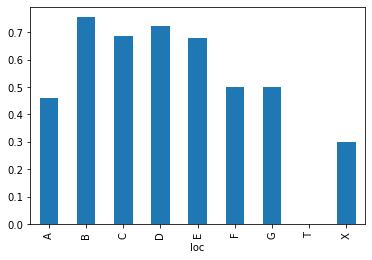

In [18]:
df[['loc', 'survived']].groupby('loc')['survived'].mean().plot(kind= 'bar')

In [19]:
df.drop(['cabin', 'ticket', 'passenger_id'], axis=1, inplace=True)

In [20]:
df.columns

Index(['fare', 'embarked', 'home.dest', 'survived', 'pclass', 'name', 'sex',
       'age', 'sibsp', 'parch', 'loc'],
      dtype='object')

In [21]:
print(df['age'].median())

display(df.groupby(['pclass', 'sex'])['age'].count())

display(df.groupby(['pclass', 'sex'])['age'].median())

28.0


pclass  sex   
1.0     female     94
        male       98
2.0     female     74
        male      104
3.0     female    109
        male      250
Name: age, dtype: int64

pclass  sex   
1.0     female    36.0
        male      42.0
2.0     female    25.5
        male      28.0
3.0     female    22.0
        male      25.0
Name: age, dtype: float64

In [22]:
df['age'] = df.groupby(['pclass', 'sex'])['age'].apply(lambda x: x.fillna(x.median()))
df.isnull().sum()

fare           0
embarked       2
home.dest    403
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

## Feature Engineering
- Still need to handle fare, embarked, boat, body, home.dest

<AxesSubplot:xlabel='pclass'>

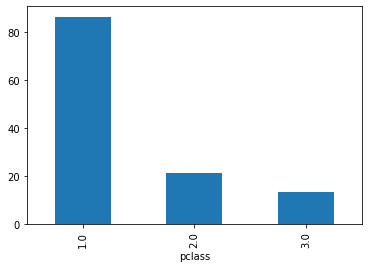

In [23]:
df[['fare', 'pclass']].groupby('pclass')['fare'].mean().plot(kind= 'bar')

In [24]:
pd.crosstab(df['pclass'], df['survived'])

survived,0.0,1.0
pclass,,
1.0,80,141
2.0,102,85
3.0,384,125


Text(0, 0.5, 'survived')

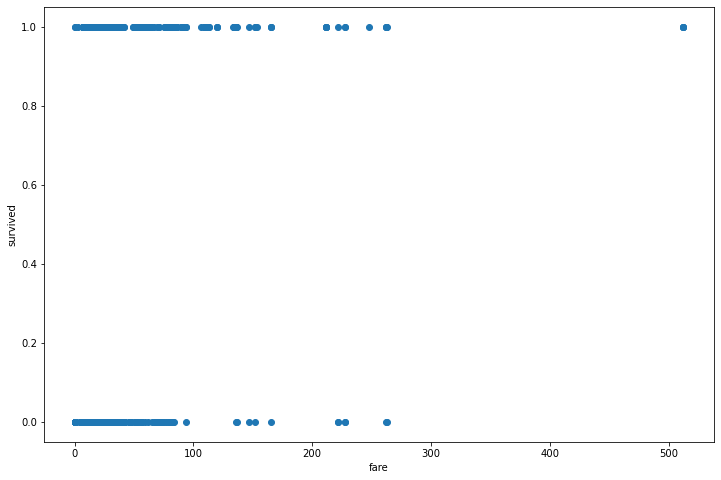

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize = (12, 8))
plt.scatter(df['fare'], df['survived'])
plt.xlabel('fare')
plt.ylabel('survived')

## Review Correlations

In [26]:
corr = df.corr()
corr

,fare,survived,pclass,age,sibsp,parch
fare,1.000000,0.269844,-0.544001,0.235161,0.119651,0.188917
survived,0.269844,1.000000,-0.339137,-0.029569,-0.034097,0.113710
pclass,-0.544001,-0.339137,1.000000,-0.453191,0.076289,0.016213
age,0.235161,-0.029569,-0.453191,1.000000,-0.182303,-0.130141
sibsp,0.119651,-0.034097,0.076289,-0.182303,1.000000,0.350948
parch,0.188917,0.113710,0.016213,-0.130141,0.350948,1.000000


<AxesSubplot:>

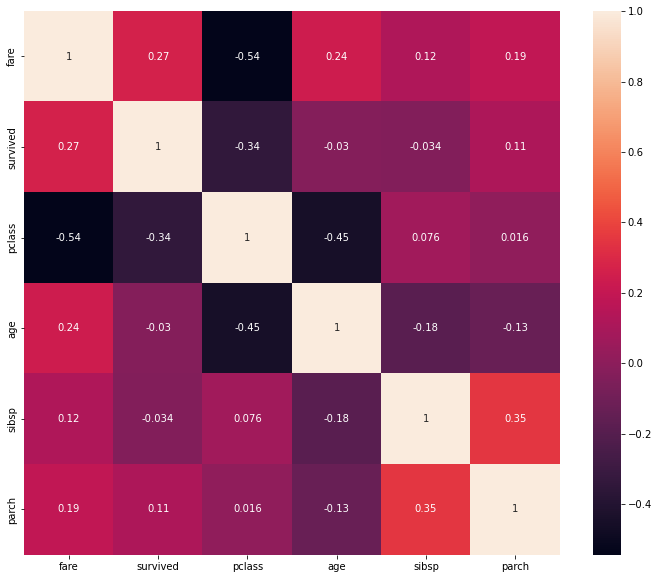

In [27]:
fig, ax = plt.subplots(figsize = (12, 10))
sns.heatmap(corr, annot = True)

## Feature Engineering
- High correlation between pclass and fare - we will remove the fare

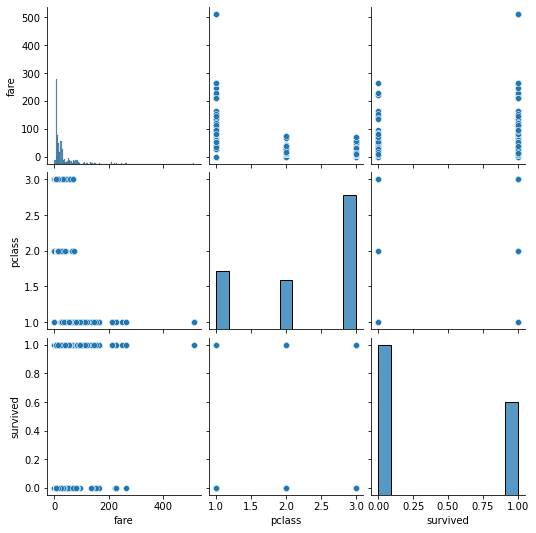

In [28]:
dftemp = df[['fare','pclass', 'survived']]
sns.pairplot(dftemp)

## Drop fare - lower correlation factor to survived than pclass

In [29]:
df.drop(['fare'], axis=1, inplace=True)

In [30]:
df.isnull().sum()

embarked       2
home.dest    403
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

In [31]:
df['embarked'].unique()

array(['S', 'Q', 'C', nan], dtype=object)

In [32]:
print(df['embarked'].value_counts())

S    643
C    185
Q     87
Name: embarked, dtype: int64


In [33]:
df['embarked'] = df['embarked'].fillna('S')
df = df.dropna(subset=['pclass'])

In [34]:
df.isnull().sum()

embarked       0
home.dest    403
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

In [35]:
#boat and body have been removed from the dataset
#df.drop(['boat', 'body'], axis=1, inplace=True)

In [36]:
df.isnull().sum()

embarked       0
home.dest    403
survived       0
pclass         0
name           0
sex            0
age            0
sibsp          0
parch          0
loc            0
dtype: int64

In [37]:
df['home.dest'].unique()

array([nan, 'Ilfracombe, Devon', 'St Louis, MO', 'New York, NY',
       'England / Bennington, VT', 'Paris, France', 'Zurich, Switzerland',
       'Paris / Montreal, PQ', 'Sweden  Worcester, MA', 'Stanton, IA',
       'Sweden Worcester, MA', 'Ruotsinphytaa, Finland New York, NY',
       'Westcliff-on-Sea, Essex', 'Cape Town, South Africa / Seattle, WA',
       'Belfast', 'Brooklyn, NY', 'Syria New York, NY',
       'Haverford, PA / Cooperstown, NY', 'Ireland Brooklyn, NY',
       'Strood, Kent, England Detroit, MI', 'London', 'Philadelphia, PA',
       'Liverpool, England / Belfast',
       'Co Limerick, Ireland Sherbrooke, PQ', 'Vancouver, BC',
       'Youngstown, OH', 'Boston, MA', 'Mexico City, Mexico',
       'London, England / Marietta, Ohio and Milwaukee, WI',
       'Ireland Chicago, IL', 'Nice, France', 'Bournemouth, England',
       'Bryn Mawr, PA, USA', 'West Bromwich, England Pontiac, MI',
       'Syria', 'West Haven, CT', 'Duluth, MN',
       'Bath, England / Massachusetts'

In [38]:
## Maybe useful for model, but will require a lot of clean-up given the low correlation score, let's drop the column
df.drop(['home.dest'], axis=1, inplace=True)

In [39]:
df.dtypes

embarked     object
survived    float64
pclass      float64
name         object
sex          object
age         float64
sibsp       float64
parch       float64
loc          object
dtype: object

In [40]:
df.head(5)

,embarked,survived,pclass,name,sex,age,sibsp,parch,loc
0,S,0.0,3.0,"Webber, Mr. James",male,25.0,0.0,0.0,X
1,S,0.0,2.0,"Phillips, Mr. Escott Robert",male,43.0,0.0,1.0,X
2,S,0.0,3.0,"Van Impe, Miss. Catharina",female,10.0,0.0,2.0,X
3,Q,0.0,3.0,"McEvoy, Mr. Michael",male,25.0,0.0,0.0,X
4,S,1.0,1.0,"Robert, Mrs. Edward Scott (Elisabeth Walton Mc...",female,43.0,0.0,1.0,B


In [41]:
df['hasFamily'] = (df['sibsp'] > 0) | (df['parch'] > 0)
df.drop(['sibsp', 'parch', 'name'], axis=1, inplace=True)

In [42]:
df.dtypes

embarked      object
survived     float64
pclass       float64
sex           object
age          float64
loc           object
hasFamily       bool
dtype: object

In [43]:
import os
script_folder = os.path.join(os.getcwd(), "train")
print(script_folder)
os.makedirs(script_folder, exist_ok=True)
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('./train/data.csv', index = False)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/titantic-dataset-private/train


In [44]:
df.columns

Index(['embarked', 'survived', 'pclass', 'sex', 'age', 'loc', 'hasFamily'], dtype='object')

In [45]:
## Convert categorical value to ordered integer values
from sklearn import preprocessing
label_encoding = preprocessing.LabelEncoder()
df['sex'] = label_encoding.fit_transform(df['sex'].astype(str))
print(label_encoding.classes_)
df.head(5)

['female' 'male']


,embarked,survived,pclass,sex,age,loc,hasFamily
0,S,0.0,3.0,1,33.0000,X,False
1,S,0.0,2.0,1,54.0000,X,False
2,S,1.0,1.0,1,0.9167,C,True
3,S,1.0,2.0,0,24.0000,X,True
4,S,0.0,3.0,1,25.0000,X,True


In [46]:
## categorical values with no order cna be converted using 1-hot encording
df = pd.get_dummies(df, columns = ['embarked', 'loc'])
df.head(5)

,survived,pclass,sex,age,hasFamily,embarked_C,embarked_Q,embarked_S,loc_A,loc_B,loc_C,loc_D,loc_E,loc_F,loc_G,loc_T,loc_X
0,0.0,3.0,1,33.0000,False,0,0,1,0,0,0,0,0,0,0,0,1
1,0.0,2.0,1,54.0000,False,0,0,1,0,0,0,0,0,0,0,0,1
2,1.0,1.0,1,0.9167,True,0,0,1,0,0,1,0,0,0,0,0,0
3,1.0,2.0,0,24.0000,True,0,0,1,0,0,0,0,0,0,0,0,1
4,0.0,3.0,1,25.0000,True,0,0,1,0,0,0,0,0,0,0,0,1


In [47]:
from sklearn.model_selection import train_test_split
X = df.drop('survived', axis = 1)
Y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [48]:
X_train.shape, y_train.shape

((733, 16), (733,))

In [49]:
from sklearn.linear_model import LogisticRegression
#regularization - penality of complex models
lg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(X_train, y_train)

In [50]:
X_test.dtypes
X_test.to_csv('./Data/checkMe.csv')
X_train.to_csv('./Data/checkMe2.csv')

In [51]:
X_test.head(170)

,pclass,sex,age,hasFamily,embarked_C,embarked_Q,embarked_S,loc_A,loc_B,loc_C,loc_D,loc_E,loc_F,loc_G,loc_T,loc_X
306,1.0,1,47.0,False,0,0,1,0,0,0,0,1,0,0,0,0
710,1.0,1,42.0,False,0,0,1,1,0,0,0,0,0,0,0,0
298,3.0,1,19.0,False,0,0,1,0,0,0,0,0,0,0,0,1
466,3.0,1,24.0,False,0,0,1,0,0,0,0,0,0,0,0,1
253,3.0,1,25.0,False,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,1.0,1,42.0,False,0,0,1,0,0,0,0,0,0,0,0,1
522,3.0,1,7.0,True,1,0,0,0,0,0,0,0,0,0,0,1
752,3.0,1,45.5,False,1,0,0,0,0,0,0,0,0,0,0,1
362,3.0,1,28.0,False,0,0,1,0,0,0,0,0,0,0,0,1


In [52]:
y_pred = lg.predict(X_test)

In [53]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results.head(10)

,y_test,y_pred
306,0.0,0.0
710,0.0,0.0
298,0.0,0.0
466,0.0,0.0
253,0.0,0.0
230,0.0,0.0
753,0.0,0.0
14,1.0,1.0
202,1.0,1.0
31,0.0,1.0


In [56]:
cross_tab = pd.crosstab(results.y_test, results.y_pred )
cross_tab

y_pred,0.0,1.0
y_test,,
0.0,100,15
1.0,15,54


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(acc)
print(prec)
print(recall)

0.8369565217391305
0.782608695652174
0.782608695652174


## Building Repeatable model

Starting experiment: titanic_hackathon
Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily', 'survived'], dtype='object')
Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'], dtype='object')
AUC: 0.8621093750000001
Accuracy: 0.8369565217391305


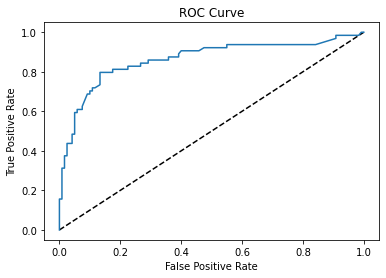

Model trained and registered.


In [57]:
# Separate features and labels
import os
import sys
import argparse
import joblib
import pandas as pd
import numpy as np

from azureml.core import Run, Dataset, Workspace, Experiment

from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import roc_auc_score,roc_curve


from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


def buildpreprocessorpipeline(X_raw):
    categorical_features = X_raw.select_dtypes(include=['object', 'bool']).columns
    numeric_features = X_raw.select_dtypes(include=['float','int64']).columns


    categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant', fill_value="missing")),
                                              ('onehotencoder', OneHotEncoder(categories='auto', sparse=False, handle_unknown='ignore'))])
    
    numeric_transformer1 = Pipeline(steps=[('scaler1', SimpleImputer(missing_values=np.nan, strategy = 'mean'))])
    #numeric_transformer2 = Pipeline(steps=[('scaler2', StandardScaler(with_mean=True))])
    
    preprocessor = ColumnTransformer(
        transformers=[
            ('numeric1', numeric_transformer1, numeric_features),
            ('categorical', categorical_transformer, categorical_features)
        ], remainder="drop")
    
    return preprocessor

def model_train(LABEL, df, run):  
    y_raw = df[LABEL]
    X_raw = df.drop([LABEL], axis=1)
    print(X_raw.columns)
     # Train test split
    X_train, X_test, y_train, y_test = train_test_split(X_raw, y_raw, test_size=0.2, random_state=0)
    
    #use Logistic Regression estimator from scikit learn
    lg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
    preprocessor = buildpreprocessorpipeline(X_train)
    
    #estimator instance
    clf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', lg)])

    model = clf.fit(X_train, y_train)
    
    
    # calculate AUC
    y_scores = model.predict_proba(X_test)
    auc = roc_auc_score(y_test,y_scores[:,1])
    print('AUC: ' + str(auc))
    run.log('AUC', np.float(auc))

    
    # calculate test accuracy
    y_hat = model.predict(X_test)
    acc = np.average(y_hat == y_test)
    print('Accuracy:', acc)
    run.log('Accuracy', np.float(acc))

    # plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])
    fig = plt.figure(figsize=(6, 4))
    # Plot the diagonal 50% line
    plt.plot([0, 1], [0, 1], 'k--')
    # Plot the FPR and TPR achieved by our model
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    run.log_image(name = "ROC", plot = fig)
    plt.show()

    # plot confusion matrix
    # Generate confusion matrix
    cmatrix = confusion_matrix(y_test, y_hat)
    cmatrix_json = {
        "schema_type": "confusion_matrix",
           "schema_version": "v1",
           "data": {
               "class_labels": ["0", "1"],
               "matrix": [
                   [int(x) for x in cmatrix[0]],
                   [int(x) for x in cmatrix[1]]
               ]
           }
    }
    
    run.log_confusion_matrix('ConfusionMatrix_Test', cmatrix_json)

    return model
    # Save the trained model
    
    
def main():
    # Create an Azure ML experiment in your workspace
    experiment = Experiment(workspace=ws, name= 'titanic_hackathon')
    run = experiment.start_logging()
    print("Starting experiment:", experiment.name)

    #df = pd.read_csv('./train/data.csv')
    df1 = pd.read_csv('./Data/Train1.csv')
    df2 = pd.read_csv('./Data/Train2.csv')
    df = df1.merge(df2, on = 'passenger_id', how = 'inner')
    df['loc']= df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'X')
    df['hasFamily'] = (df['sibsp'] > 0) | (df['parch'] > 0)
    cols_to_keep = ['pclass','sex','age','embarked','loc','hasFamily', 'survived']
    df = df[cols_to_keep]
    print(df.columns)


    model = model_train('survived', df, run)
    
    os.makedirs('outputs', exist_ok=True)
    # note file saved in the outputs folder is automatically uploaded into experiment record

    model_file = 'outputs/titanic_model.pkl'
    joblib.dump(value=model, filename=model_file)

    
    run.complete()
    
    # Register the model
    run.register_model(model_path=model_file, model_name= 'titanic-model',
                   tags={'Model Type':'Logistic Regresssion'})

    
    print('Model trained and registered.')

if __name__ == "__main__":
    main()

## Review results and confirm model is usable

You can download the model from the workspace and confirm you can inference using the model before worrying about deploying the model. This is a **great** test

In [58]:
from azureml.core.model import Model
import os

script_folder = os.path.join(os.getcwd(), "model_download")
print(script_folder)
os.makedirs(script_folder, exist_ok=True)

model = Model(workspace=ws, name="titanic-model")
print(model)
model.download(target_dir=script_folder, exist_ok=True)

/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/titantic-dataset-private/model_download
Model(workspace=Workspace.create(name='mm-hackathon-prep', subscription_id='5da07161-3770-4a4b-aa43-418cbbb627cf', resource_group='mm-hackathon-prep-rg'), name=titanic-model, id=titanic-model:15, version=15, tags={'Model Type': 'Logistic Regresssion'}, properties={})


'/mnt/batch/tasks/shared/LS_root/mounts/clusters/memasanz4/code/Users/memasanz/titantic-dataset-private/model_download/titanic_model.pkl'

In [60]:
df = pd.read_csv('./train/data.csv')

#the columns you use to build the model are the columns you should use to inference the data. 
columsn_to_keep = ['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily']
X = df[columsn_to_keep]
model_path = script_folder + '/titanic_model.pkl'
model = joblib.load(model_path)

In [61]:
X.columns
#'pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'

Index(['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily'], dtype='object')

In [62]:
y_pred = model.predict(X)
y_test = df['survived'].to_list()

In [63]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,0.0,0.0
...,...,...
912,1.0,0.0
913,0.0,0.0
914,0.0,0.0
915,1.0,1.0


## Retrieve Metrics

- These metrics are calculated on the test dataset.  We will perform these same calculations on unseen data

In [65]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(acc)
print(prec)
print(recall)

0.787350054525627
0.7228571428571429
0.7207977207977208


## Retrieve Metrics

- Using hold out dataset

In [66]:
df = pd.read_csv('./Data/Hold.csv')
print(df.columns)
print(df.shape)
print(df.dtypes)

Index(['passenger_id', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch',
       'ticket', 'fare', 'cabin', 'embarked', 'home.dest', 'survived'],
      dtype='object')
(393, 13)
passenger_id      int64
pclass          float64
name             object
sex              object
age             float64
sibsp           float64
parch           float64
ticket           object
fare            float64
cabin            object
embarked         object
home.dest        object
survived        float64
dtype: object


In [67]:
print(df.isnull().sum())
df['survived'] = df['survived'].fillna(0)
print(df.isnull().sum())

passenger_id      0
pclass            1
name              1
sex               1
age              76
sibsp             1
parch             1
ticket            1
fare              2
cabin           303
embarked          1
home.dest       162
survived          1
dtype: int64
passenger_id      0
pclass            1
name              1
sex               1
age              76
sibsp             1
parch             1
ticket            1
fare              2
cabin           303
embarked          1
home.dest       162
survived          0
dtype: int64


In [68]:
df

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest,survived
0,1139,3.0,"Storey, Mr. Thomas",male,60.5,0.0,0.0,3701,NaN,NaN,S,NaN,0.0
1,533,3.0,"Larsson, Mr. August Viktor",male,29.0,0.0,0.0,7545,9.4833,NaN,S,NaN,0.0
2,459,3.0,"Lefebre, Miss. Jeannie",female,NaN,3.0,1.0,4133,25.4667,NaN,S,NaN,0.0
3,1150,3.0,"Hansen, Mr. Henry Damsgaard",male,21.0,0.0,0.0,350029,7.8542,NaN,S,NaN,0.0
4,393,2.0,"Gavey, Mr. Lawrence",male,26.0,0.0,0.0,31028,10.5000,NaN,S,"Guernsey / Elizabeth, NJ",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,914,2.0,"Hold, Mr. Stephen",male,44.0,1.0,0.0,26707,26.0000,NaN,S,"England / Sacramento, CA",0.0
389,580,3.0,"Johnson, Mr. Alfred",male,49.0,0.0,0.0,LINE,0.0000,NaN,S,NaN,0.0
390,1080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
391,1250,3.0,"Daher, Mr. Shedid",male,22.5,0.0,0.0,2698,7.2250,NaN,C,NaN,0.0


Create feature columns required by the model for inferencing.  What the model was trained on, is what it will inference on.

In [70]:
df['loc']= df['cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'X')
df['hasFamily'] = (df['sibsp'] > 0) | (df['parch'] > 0)
columsn_to_keep = ['pclass', 'sex', 'age', 'embarked', 'loc', 'hasFamily']
    
    
X = df[columsn_to_keep]
model_path = script_folder + '/titanic_model.pkl'
model = joblib.load(model_path)

In [71]:
y_pred = model.predict(X)
y_test = df['survived'].to_list()

In [72]:
results = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred})
results

,y_test,y_pred
0,0.0,0.0
1,0.0,0.0
2,0.0,1.0
3,0.0,0.0
4,0.0,0.0
...,...,...
388,0.0,0.0
389,0.0,0.0
390,0.0,0.0
391,0.0,0.0


In [73]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(acc)
print(prec)
print(recall)

0.7989821882951654
0.7364864864864865
0.7315436241610739
